In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/mohit/virtualenvs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [11]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

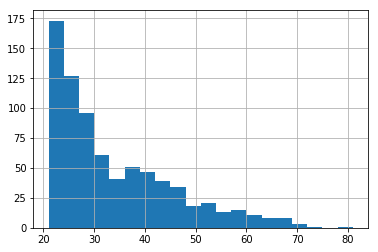

In [12]:
diabetes['Age'].hist(bins = 20)

In [13]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

In [14]:
feat_cols = [num_preg, plasma_gluc, dias_press,tricep, insulin, bmi, diabetes_pedigree, assigned_group, 
             age_bucket]

In [15]:
# TRAIN TEST SPLIT

In [16]:
x_data = diabetes.drop('Class', axis = 1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [17]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 36)

In [20]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [21]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2ddac3e80>, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpcymk9vnu', '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_task_id': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_master': '', '_session_config': None, '_is_chief': True, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000}


In [22]:
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpcymk9vnu/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 280.959
INFO:tensorflow:loss = 7.2375307, step = 101 (0.356 sec)
INFO:tensorflow:global_step/sec: 359.469
INFO:tensorflow:loss = 6.1093874, step = 201 (0.278 sec)
INFO:tensorflow:global_step/sec: 352.933
INFO:tensorflow:loss = 5.8609695, step = 301 (0.284 sec)
INFO:tensorflow:global_step/sec: 348.775
INFO:tensorflow:loss = 5.152904, step = 401 (0.286 sec)
INFO:tensorflow:global_step/sec: 342.496
INFO:tensorflow:loss = 5.6834173, step = 501 (0.292 sec)
INFO:tensorflow:global_step/sec: 344.969
INFO:tensorflow:loss = 4.205145, step = 601 (0.290 sec)
INFO:tensorflow:global_step/sec: 335.513
INFO:tensorflow:los

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1,
                                                     shuffle = False)

In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-23-23:48:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcymk9vnu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-23-23:48:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64069265, auc = 0.82570827, auc_precision_recall = 0.6746066, average_loss = 0.5173277, global_step = 1000, label/mean = 0.35930735, loss = 4.979279, prediction/mean = 0.3451579


In [25]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64069265,
 'auc': 0.82570827,
 'auc_precision_recall': 0.6746066,
 'average_loss': 0.5173277,
 'global_step': 1000,
 'label/mean': 0.35930735,
 'loss': 4.979279,
 'prediction/mean': 0.3451579}

In [26]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs = 1,
                                                      shuffle = False)

In [27]:
predictions = model.predict(pred_input_func)

In [28]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcymk9vnu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.30730066], dtype=float32),
  'logits': array([-0.8127694], dtype=float32),
  'probabilities': array([0.6926993 , 0.30730066], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.7149484], dtype=float32),
  'logits': array([0.9195404], dtype=float32),
  'probabilities': array([0.28505155, 0.7149484 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.11955649], dtype=float32),
  'logits': array([-1.9966366], dtype=float32),
  'probabilities': array([0.8804435 , 0.11955651], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.43854362], dtype=float32),
  'logits': array([-0.24707484], dtype=float32),
  'probabilities': array([0.56145644, 0.4385436 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=o

In [30]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension = 4)

In [31]:
feat_cols = [num_preg, plasma_gluc, dias_press,tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, 
             age_bucket]

In [32]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2dd459400>, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpf552cypg', '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_task_id': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_master': '', '_session_config': None, '_is_chief': True, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000}


In [34]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpf552cypg/model.ckpt.
INFO:tensorflow:loss = 6.8127575, step = 1
INFO:tensorflow:global_step/sec: 327.122
INFO:tensorflow:loss = 5.0767455, step = 101 (0.305 sec)
INFO:tensorflow:global_step/sec: 362.521
INFO:tensorflow:loss = 4.1282673, step = 201 (0.276 sec)
INFO:tensorflow:global_step/sec: 401.095
INFO:tensorflow:loss = 5.2592554, step = 301 (0.249 sec)
INFO:tensorflow:global_step/sec: 385.597
INFO:tensorflow:loss = 5.4057956, step = 401 (0.262 sec)
INFO:tensorflow:global_step/sec: 387.17
INFO:tensorflow:loss = 3.8342185, step = 501 (0.255 sec)
INFO:tensorflow:global_step/sec: 304.758
INFO:tensorflow:loss = 5.0562415, step = 601 (0.329 sec)
INFO:tensorflow:global_step/sec: 399.772
INFO:tensorflow:l

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 10,
                                                     shuffle = False)

In [36]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-23-23:49:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf552cypg/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-23-23:49:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7965368, accuracy_baseline = 0.64069265, auc = 0.8532644, auc_precision_recall = 0.73202735, average_loss = 0.4684406, global_step = 1000, label/mean = 0.35930735, loss = 4.684406, prediction/mean = 0.41388878


{'accuracy': 0.7965368,
 'accuracy_baseline': 0.64069265,
 'auc': 0.8532644,
 'auc_precision_recall': 0.73202735,
 'average_loss': 0.4684406,
 'global_step': 1000,
 'label/mean': 0.35930735,
 'loss': 4.684406,
 'prediction/mean': 0.41388878}